In [84]:
#Importing pandas & OS
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Retrieving CSV file
file_path = os.path.join("conposcovidloc.csv")
datafile_df = pd.read_csv(file_path)

#Changing case_reported_date to data format
datafile_df['Case_Reported_Date'] = pd.to_datetime(datafile_df['Case_Reported_Date'])
datafile_df.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-10-31,2020-11-01,2020-11-01,2020-11-01,20s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
1,2,2020-10-17,2020-10-30,2020-10-30,2020-10-30,40s,MALE,OB,Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
2,3,2020-10-30,2020-11-02,2020-11-02,2020-10-31,50s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
3,4,2020-10-30,2020-11-01,2020-11-01,2020-11-01,20s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
4,5,2020-10-30,2020-11-01,2020-11-01,2020-10-31,40s,MALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156


In [5]:
# Get some statistics
datafile_df.describe()

,Row_ID,Reporting_PHU_Latitude,Reporting_PHU_Longitude
count,78705.000000,78705.000000,78705.000000
mean,39353.000000,43.806614,-79.341878
std,22720.320805,0.723366,1.614435
min,1.000000,42.308796,-94.488254
25%,19677.000000,43.647471,-79.708893
50%,39353.000000,43.656591,-79.379358
75%,59029.000000,43.898605,-79.379358
max,78705.000000,49.769615,-74.736298


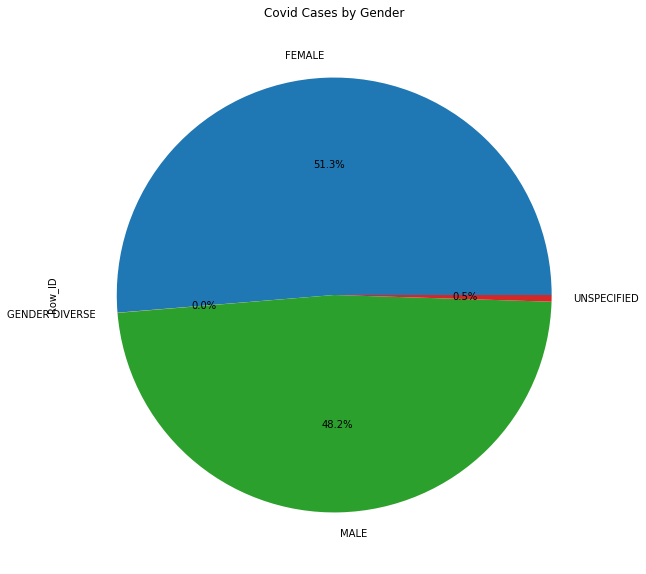

In [96]:
# Get covid case by Gender
# groupby object
gender_total = datafile_df.groupby("Client_Gender")['Row_ID'].count()

# plot
gender_total.plot(kind='pie',figsize=(10, 10),title="Covid Cases by Gender",autopct="%1.1F%%")
plt.show()

#gender_total

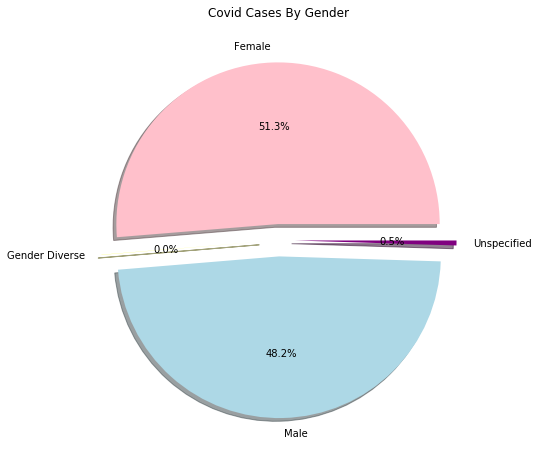

In [97]:
# Convert series into dataframe
gender_plot = gender_total.to_frame()
gender_plot.index.name = 'Client_Gender'
gender_plot.reset_index(level=None, drop=False, inplace=True)
renamed_gender_plot = gender_plot.rename(columns={"Gender":"Gender", "Total":"Total"})
renamed_gender_plot

#renamed_gender_plot

# Passing plot details
sex = ['Female','Gender Diverse','Male','Unspecified']
count = ['40374','13','37930','388']
x_axis = np.arange(0,len(sex))
explode = (0.1,0.1,0.1,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.figure(figsize=(7,8))
colors= ['pink','yellow','lightblue','purple']
plt.title("Covid Cases By Gender")
plt.pie(count,labels=sex,colors=colors,autopct="%1.1f%%",shadow=True, explode=explode)

# Create axes which are equal so we have a perfect circle
plt.axis('equal')

plt.show()